In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-claim/insurance_claims.csv


In [2]:
df=pd.read_csv('/kaggle/input/insurance-claim/insurance_claims.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [5]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df['policy_state'].unique()


array(['OH', 'IN', 'IL'], dtype=object)

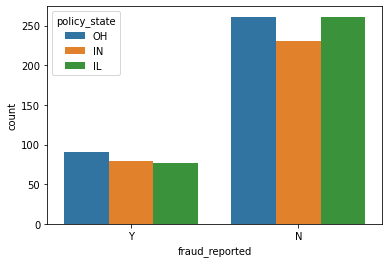

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=df['fraud_reported'],hue=df['policy_state'],data=df)

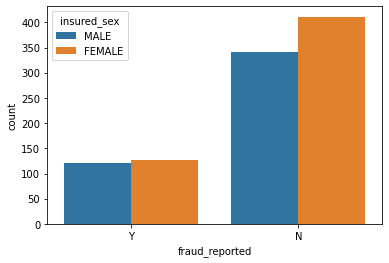

In [9]:
sns.countplot(x=df['fraud_reported'],hue='insured_sex',data=df)

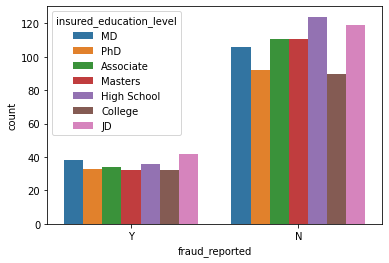

In [10]:
sns.countplot(x=df['fraud_reported'],hue=df['insured_education_level'],data=df)

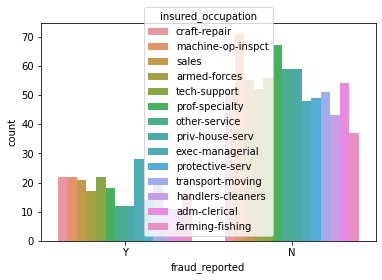

In [11]:
sns.countplot(x=df['fraud_reported'],hue='insured_occupation',data=df)

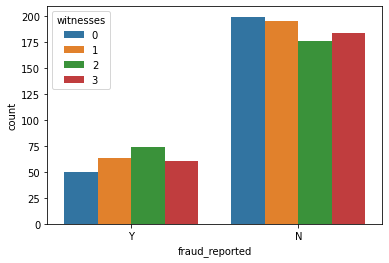

In [12]:
sns.countplot(x=df['fraud_reported'],hue='witnesses',data=df)

In [13]:
df['police_report_available']=df['police_report_available'].replace({'?':np.nan})

In [14]:
df['police_report_available']=df['police_report_available'].fillna(method='ffill')

In [15]:
df['collision_type']=df['collision_type'].replace({'?':np.nan})

In [16]:
df['collision_type']=df['collision_type'].fillna(method='ffill')

In [17]:
df['property_damage']=df['property_damage'].replace({'?':np.nan})

In [18]:
df['property_damage']=df['property_damage'].fillna(method='ffill')

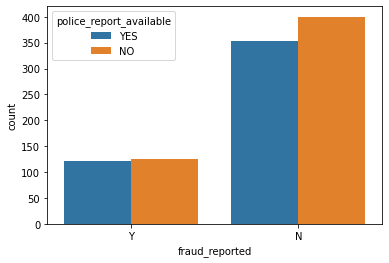

In [19]:
sns.countplot(x=df['fraud_reported'],hue='police_report_available',data=df)

In [20]:
#lets drop the unnecessary feature 
df=df.drop(['months_as_customer','policy_number','policy_bind_date','policy_csl','auto_year','auto_model','insured_hobbies','insured_zip'],axis=1)

In [21]:
#now deal with the categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [22]:
df

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,48,2,1000,1406.91,0,1,4,2,0,53300,...,1,1,2,1,71610,6510,13020,52080,10,1
1,42,1,2000,1197.22,5000000,1,4,6,2,0,...,1,0,0,1,5070,780,780,3510,8,1
2,29,2,2000,1413.14,5000000,0,6,11,3,35100,...,0,2,3,0,34650,7700,3850,23100,4,0
3,41,0,2000,1415.74,6000000,0,6,1,4,48900,...,0,1,2,0,63400,6340,6340,50720,3,1
4,44,0,1000,1583.91,6000000,1,0,11,4,66000,...,0,0,1,0,6500,1300,650,4550,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,2,1000,1310.80,0,0,5,2,4,0,...,1,0,1,1,87200,17440,8720,61040,6,0
996,41,0,1000,1436.79,0,0,6,9,5,70900,...,1,2,3,1,108480,18080,18080,72320,13,0
997,34,2,500,1383.49,3000000,0,5,1,2,35100,...,1,2,3,1,67500,7500,7500,52500,11,0
998,62,0,2000,1356.92,5000000,1,0,5,5,0,...,1,0,1,1,46980,5220,5220,36540,1,0


In [23]:
y=df['fraud_reported']
x=df.drop(['fraud_reported'],axis=1)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)

In [26]:
score_1

0.72

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(x_test)
score_2=accuracy_score(y_test,pred_2)

In [28]:
score_2

0.77

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_3=gbc.predict(x_test)
score_3=accuracy_score(y_test,pred_3)

In [30]:
score_3

0.76

In [31]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
pred_4=xgb.predict(x_test)
score_4=accuracy_score(y_test,pred_4)

In [32]:
score_4

0.765